In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(42)

annees = np.arange(1980, 2021)
true_a = 0.3
true_b = 90
tempos = true_a * annees + true_b + np.random.normal(0, 3, size=len(annees))
df = pd.DataFrame({'Ann√©e': annees, 'Tempo (BPM)': tempos})
df.head()

Ann√©e  Tempo (BPM)
0   1980   685.490142
1   1981   683.885207
2   1982   686.543066
3   1983   689.469090
4   1984   684.497540

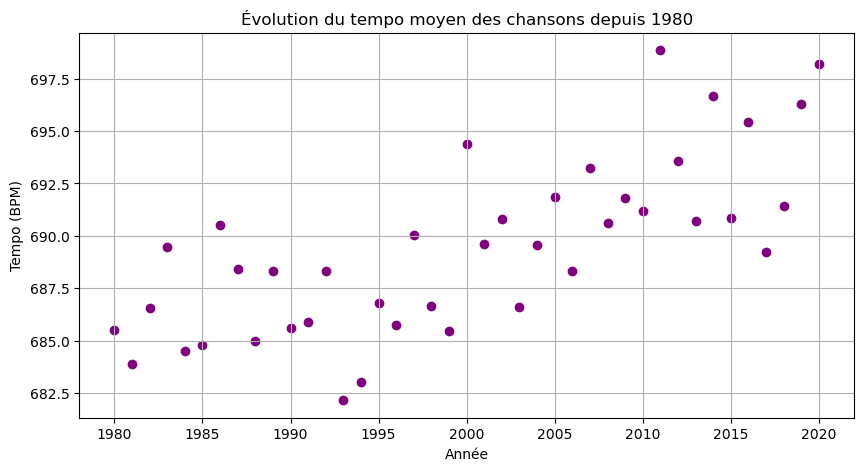

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Ann√©e'], df['Tempo (BPM)'], color='purple')
plt.title("√âvolution du tempo moyen des chansons depuis 1980")
plt.xlabel("Ann√©e")
plt.ylabel("Tempo (BPM)")
plt.grid(True)
plt.show()

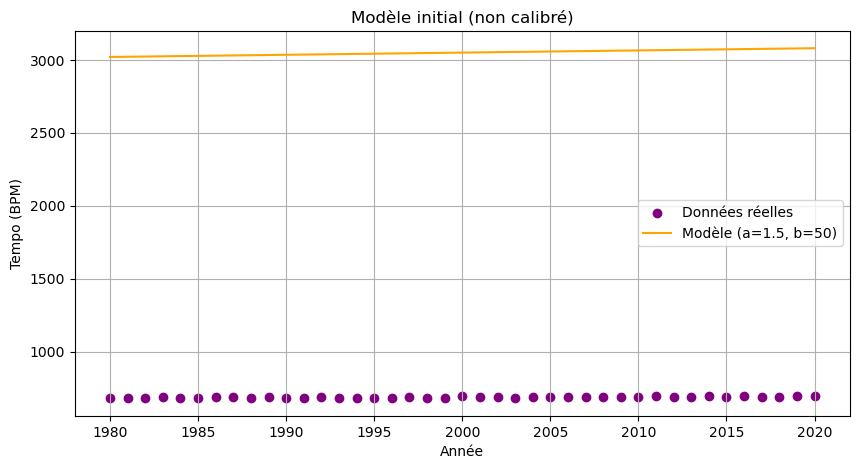

In [4]:
def modele_lineaire(x, a, b):
    return a * x + b

a_test, b_test = 1.5, 50
df['Tempo pr√©d (mod√®le test)'] = modele_lineaire(df['Ann√©e'], a_test, b_test)

plt.figure(figsize=(10, 5))
plt.scatter(df['Ann√©e'], df['Tempo (BPM)'], label="Donn√©es r√©elles", color='purple')
plt.plot(df['Ann√©e'], df['Tempo pr√©d (mod√®le test)'], label="Mod√®le (a=1.5, b=50)", color='orange')
plt.title("Mod√®le initial (non calibr√©)")
plt.xlabel("Ann√©e")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

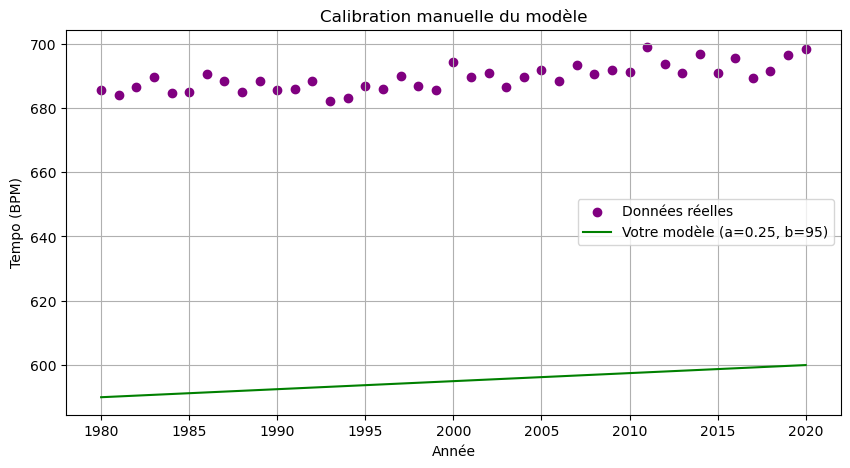

In [5]:
a_user = 0.25
b_user = 95

df['Tempo pr√©d (vous)'] = modele_lineaire(df['Ann√©e'], a_user, b_user)

plt.figure(figsize=(10, 5))
plt.scatter(df['Ann√©e'], df['Tempo (BPM)'], label="Donn√©es r√©elles", color='purple')
plt.plot(df['Ann√©e'], df['Tempo pr√©d (vous)'], label=f"Votre mod√®le (a={a_user}, b={b_user})", color='green')
plt.title("Calibration manuelle du mod√®le")
plt.xlabel("Ann√©e")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
def erreur_moyenne_reelle_vs_modele(y_reel, y_modele):
    return np.mean(np.abs(y_reel - y_modele))

erreur = erreur_moyenne_reelle_vs_modele(df['Tempo (BPM)'], df['Tempo pr√©d (vous)'])
print(f"Erreur moyenne de votre mod√®le : {erreur:.2f} BPM")

Erreur moyenne de votre mod√®le : 94.41 BPM


c:\Users\edenimal\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


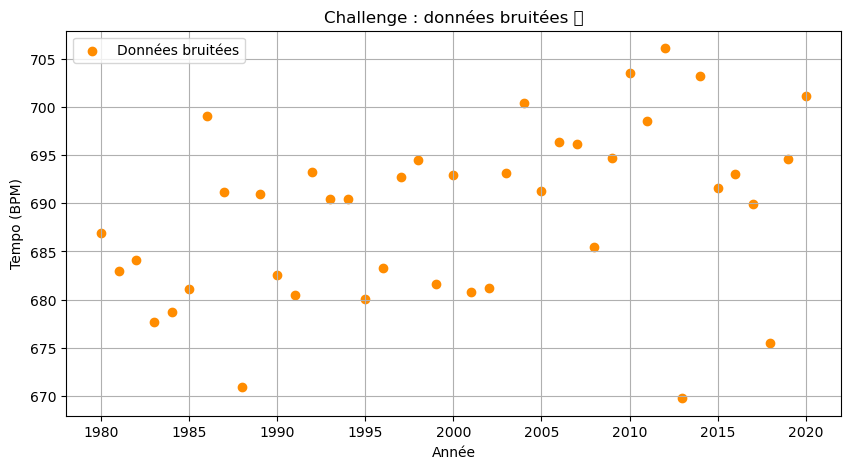

In [7]:
df_bruite = df.copy()
df_bruite['Tempo bruit√©'] = df_bruite['Tempo (BPM)'] + np.random.normal(0, 8, size=len(df))

plt.figure(figsize=(10, 5))
plt.scatter(df_bruite['Ann√©e'], df_bruite['Tempo bruit√©'], label="Donn√©es bruit√©es", color='darkorange')
plt.title("Challenge : donn√©es bruit√©es üéØ")
plt.xlabel("Ann√©e")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

### üé§ Pourquoi il y a du bruit dans les donn√©es ?

Dans la vraie vie, les donn√©es ne sont jamais parfaites.

Voici quelques raisons :
- Les mesures peuvent contenir des **erreurs** (instruments impr√©cis, humains, etc.)
- Il existe des **facteurs non pris en compte** par le mod√®le (ex: genre musical, producteur, humeur du moment‚Ä¶)
- Le monde est **complexe et variable** : deux chansons d‚Äôune m√™me ann√©e ne sont jamais identiques !

‚û°Ô∏è On appelle cela du **bruit** : c‚Äôest une variation al√©atoire qui complique le travail du mod√®le... mais le rend aussi plus r√©aliste !

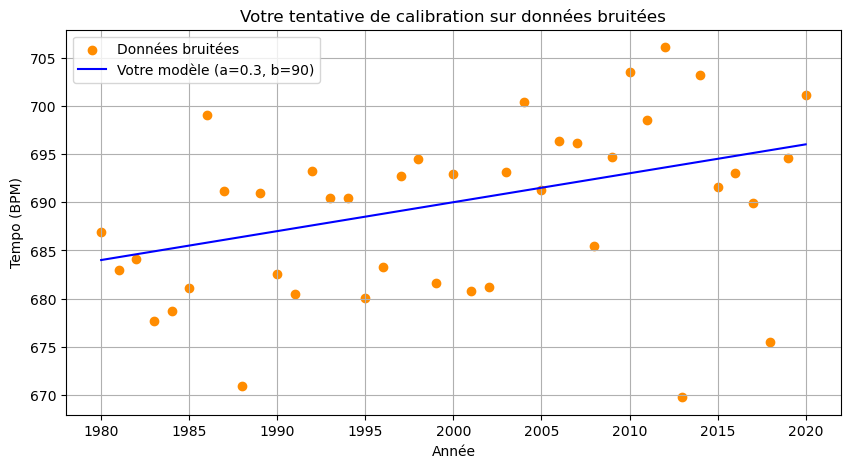

Erreur moyenne sur donn√©es bruit√©es : 6.38 BPM


In [8]:
a_bruite = 0.3
b_bruite = 90

df_bruite['Tempo pr√©d'] = modele_lineaire(df_bruite['Ann√©e'], a_bruite, b_bruite)

plt.figure(figsize=(10, 5))
plt.scatter(df_bruite['Ann√©e'], df_bruite['Tempo bruit√©'], label="Donn√©es bruit√©es", color='darkorange')
plt.plot(df_bruite['Ann√©e'], df_bruite['Tempo pr√©d'], label=f"Votre mod√®le (a={a_bruite}, b={b_bruite})", color='blue')
plt.title("Votre tentative de calibration sur donn√©es bruit√©es")
plt.xlabel("Ann√©e")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

erreur_bruite = erreur_moyenne_reelle_vs_modele(df_bruite['Tempo bruit√©'], df_bruite['Tempo pr√©d'])
print(f"Erreur moyenne sur donn√©es bruit√©es : {erreur_bruite:.2f} BPM")

Param√®tres optimis√©s automatiquement : a = -inf, b = -inf


c:\Users\edenimal\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


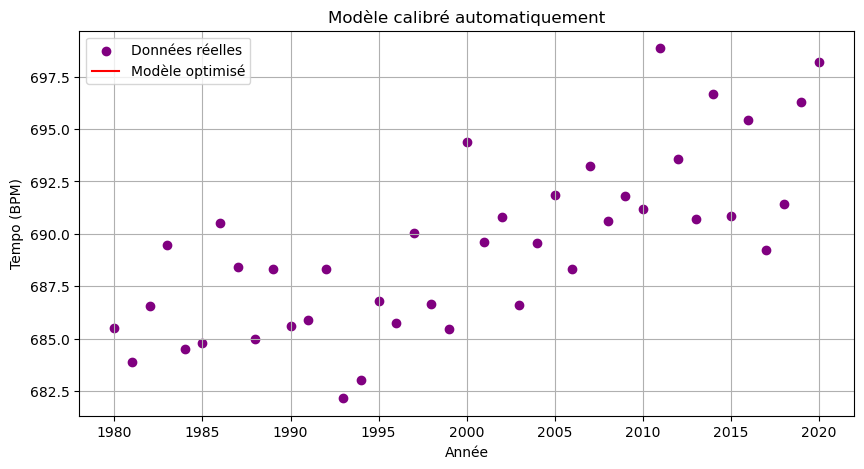

In [9]:
x = df['Ann√©e'].values
y = df['Tempo (BPM)'].values

a, b = 0.0, 0.0
learning_rate = 1e-4
epochs = 500

for _ in range(epochs):
    y_pred = a * x + b
    error = y - y_pred
    a += learning_rate * (-2 * np.mean(error * x))
    b += learning_rate * (-2 * np.mean(error))

print(f"Param√®tres optimis√©s automatiquement : a = {a:.4f}, b = {b:.4f}")

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="Donn√©es r√©elles", color='purple')
plt.plot(x, a * x + b, label="Mod√®le optimis√©", color='red')
plt.title("Mod√®le calibr√© automatiquement")
plt.xlabel("Ann√©e")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from IPython.display import Markdown

Markdown("""
### üî¨ Ce que vous venez de faire, je le fais aussi dans ma recherche...

Vous avez test√© et ajust√© un **mod√®le simple** pour qu‚Äôil colle aux **donn√©es r√©elles**.

Moi aussi je fais √ßa ! Mais avec :
- des mod√®les plus complexes (non lin√©aires),
- des incertitudes √† g√©rer,
- et des algorithmes puissants pour optimiser les param√®tres.

üëâ Vous venez de d√©couvrir ce qu‚Äôest **la calibration** d‚Äôun mod√®le : c‚Äôest une √©tape cl√© en science des donn√©es, en climatologie, en sant√©, en ing√©nierie‚Ä¶ et en musique aussi ! üé∂
""")


### üî¨ Ce que vous venez de faire, je le fais aussi dans ma recherche...

Vous avez test√© et ajust√© un **mod√®le simple** pour qu‚Äôil colle aux **donn√©es r√©elles**.

Moi aussi je fais √ßa ! Mais avec :
- des mod√®les plus complexes (non lin√©aires),
- des incertitudes √† g√©rer,
- et des algorithmes puissants pour optimiser les param√®tres.

üëâ Vous venez de d√©couvrir ce qu‚Äôest **la calibration** d‚Äôun mod√®le : c‚Äôest une √©tape cl√© en science des donn√©es, en climatologie, en sant√©, en ing√©nierie‚Ä¶ et en musique aussi ! üé∂
